In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [31]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [60]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [61]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [62]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [63]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [64]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [90]:
# Find the most recent date in the data set.
most_recent_day = session.query(Measurement.date).\
    order_by((Measurement.date).\
    desc()).first()
most_recent_day

('2017-08-23')

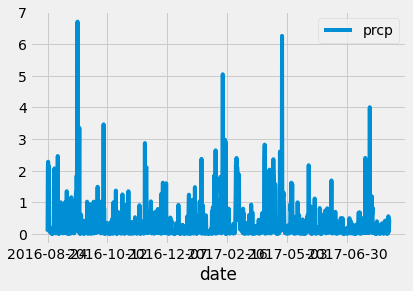

In [127]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
past_year_precip_data = session.query(Measurement.date, Measurement.prcp).\
    order_by((Measurement.date).asc()).\
    filter(Measurement.date > one_year_ago).\
    filter(Measurement.prcp).all()
    
    
# Save the query results as a Pandas DataFrame and set the index to the date column
past_year_precip_df = pd.DataFrame(past_year_precip_data)
past_year_precip_df.set_index('date', inplace=True)
# Sort the dataframe by date
past_year_precip_df.sort_values(by=['date'], ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
past_year_precip_df.plot()



In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()